##### import the libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### configure the plot style

In [2]:
plt.style.use('seaborn')
plt.rc('font', size=12) # controls default text sizes
plt.rc('axes', titlesize=18) # fontsize of the axes title
plt.rc('axes', labelsize=16) # fontsize of the x and y labels
plt.rc('xtick', labelsize=14) # fontsize of the x tick labels
plt.rc('ytick', labelsize=14) # fontsize of the y tick labels
plt.rc('legend', fontsize=14) # legend fontsize
plt.rc('figure', titlesize=18) # fontsize of the figure title
plt.rc('figure', figsize=(10,8)) # size of the figure

# Practice Peer-graded Assignment: Visualization and Imputation

### Instructions

Now that you've learned about summarizing information with data visualization and handling missing data with imputation, it's time to apply these skills to a real-world case. 

With the summary and dataset from the previous section (Getting Started with the Case Study), your first challenge is to:
- Investigate the extent and nature of the missing data
- Design and implement an imputation technique for the missing data
- Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset

### Task 1 - Investigate the extent and nature of the missing data
Investigate the new dataset and upload a visualization or multiple visualizations that summarize the nature and extent of the missing data. Be sure to include text to make your visualization clearer. Hint: You can add multiple plots to one figure in Python with matplotlib using the .subplots method.

#### Grading criteria
- Did the learner upload at least one visualization related to the nature and extent of the missing data in the new AAVAIL dataset?
- Did the learner add labels, titles, and/or other elements to help make their visualization(s) clearer?

### Solution:

#### Reading and researching the data

In [3]:
data = pd.read_csv('../data/aavail-data-visualization.csv')
data.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [4]:
data.info() # summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   country_name     1000 non-null   object 
 2   age              1000 non-null   float64
 3   customer_name    1000 non-null   object 
 4   is_subscriber    1000 non-null   bool   
 5   subscriber_type  928 non-null    object 
 6   num_streams      954 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
data.shape # data shape (objectives, features)

(1000, 7)

In [6]:
data.dtypes # features data type

customer_id          int64
country_name        object
age                float64
customer_name       object
is_subscriber         bool
subscriber_type     object
num_streams        float64
dtype: object

In [7]:
data.isnull().sum(axis=0) # features missing values

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

#### Conclusion after researching the data
Аfter researching the data set it is clear that there is missing values in features:
- subscriber_type - 72
- num_streams - 46

#### Visualization of the missing data

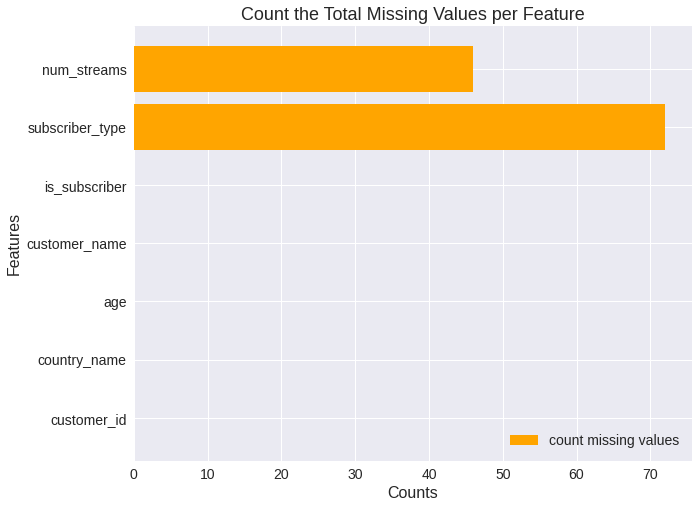

In [8]:
# plot the count of all missing values per feature in the data set (horizontal bar chart)

features = [f for f in data]
counts = [c for c in data.isnull().sum(axis=0)]

plt.barh(features, counts, label='count missing values', color='orange')
plt.title('Count the Total Missing Values per Feature')
plt.xlabel("Counts")
plt.ylabel("Features")
plt.legend(loc="lower right")
plt.show()

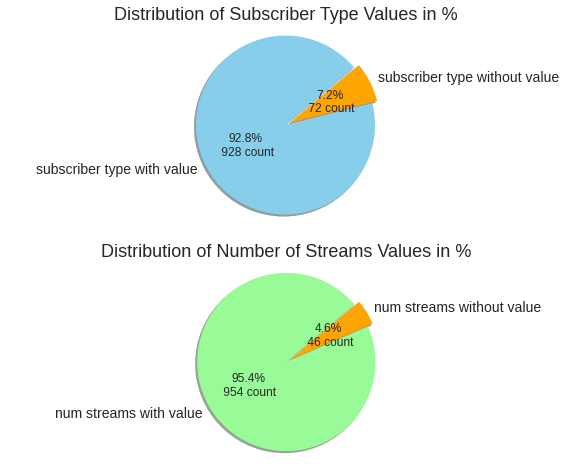

In [9]:
# plot the distributions of the features with missing values for 
# all customers (with values / missing values) in % (pie chart)

subscriber_type_val = data['subscriber_type'].notnull().sum()
subscriber_type_nan = data['subscriber_type'].isnull().sum()

num_streams_val = data['num_streams'].notnull().sum()
num_streams_nan = data['num_streams'].isnull().sum()

x1 = [subscriber_type_val, subscriber_type_nan]
autopct1 = lambda p: f'{p:.1f}%\n {(p * sum(x1) / 100):.0f} count'
explode1 = [0.03 for _ in range(len(x1))]
labels1 = [
    'subscriber type with value', 
    'subscriber type without value',
]

x2 = [num_streams_val, num_streams_nan]
autopct2 = lambda p: f'{p:.1f}%\n {(p * sum(x2) / 100):.0f} count'
explode2 = [0.03 for _ in range(len(x2))]
labels2 = [
    'num streams with value', 
    'num streams without value',
]

plt.subplot(2, 1, 1)
plt.pie(
    x=x1, 
    labels=labels1, 
    autopct=autopct1, 
    explode=explode1, 
    shadow=True, startangle=40, 
    labeldistance=1.1, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of Subscriber Type Values in %')
plt.axis('equal')

plt.subplot(2, 1, 2)
plt.pie(
    x=x2, 
    labels=labels2, 
    autopct=autopct2, 
    explode=explode2, 
    shadow=True, 
    startangle=40, 
    labeldistance=1.1, 
    pctdistance=0.5,
    colors=[
        'palegreen',
        'orange',
    ]
)
plt.title('Distribution of Number of Streams Values in %')
plt.axis('equal')    

plt.show()

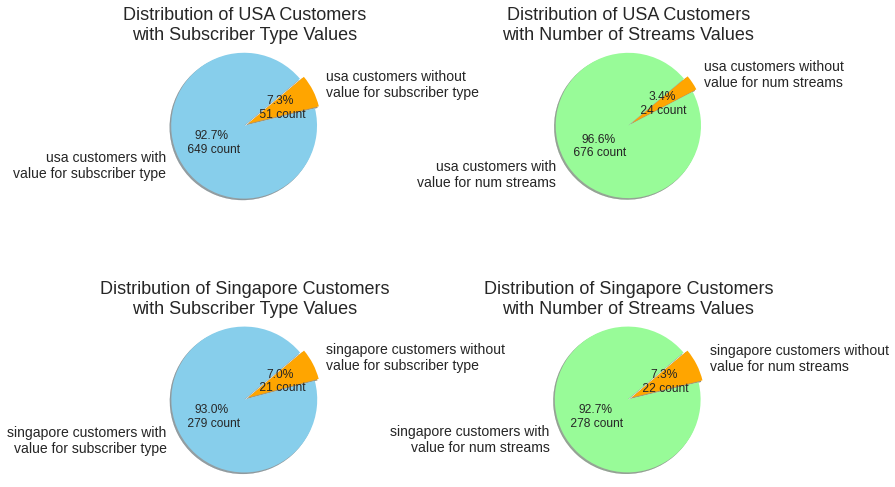

In [10]:
# plot the distributions of the customers from different countries with missing values
# (customers with values / customers with missing values) in % (pie chart)

usa_subscriber_type_val = ((data['country_name'] == 'united_states') & (data['subscriber_type'].notnull())).sum()
usa_subscriber_type_nan = ((data['country_name'] == 'united_states') & (data['subscriber_type'].isnull())).sum()

usa_num_streams_val = ((data['country_name'] == 'united_states') & (data['num_streams'].notnull())).sum()
usa_num_streams_nan = ((data['country_name'] == 'united_states') & (data['num_streams'].isnull())).sum()

singapore_subscriber_type_val = ((data['country_name'] == 'singapore') & (data['subscriber_type'].notnull())).sum()
singapore_subscriber_type_nan = ((data['country_name'] == 'singapore') & (data['subscriber_type'].isnull())).sum()

singapore_num_streams_val = ((data['country_name'] == 'singapore') & (data['num_streams'].notnull())).sum()
singapore_num_streams_nan = ((data['country_name'] == 'singapore') & (data['num_streams'].isnull())).sum()

x3 = [usa_subscriber_type_val, usa_subscriber_type_nan]
autopct3 = lambda p: f'{p:.1f}%\n {(p * sum(x3) / 100):.0f} count'
explode3 = [0.03 for _ in range(len(x3))]
labels3 = [
    'usa customers with\nvalue for subscriber type', 
    'usa customers without\nvalue for subscriber type',
]

x4 = [usa_num_streams_val, usa_num_streams_nan]
autopct4 = lambda p: f'{p:.1f}%\n {(p * sum(x4) / 100):.0f} count'
explode4 = [0.03 for _ in range(len(x4))]
labels4 = [
    'usa customers with\nvalue for num streams', 
    'usa customers without\nvalue for num streams',
]

x5 = [singapore_subscriber_type_val, singapore_subscriber_type_nan]
autopct5 = lambda p: f'{p:.1f}%\n {(p * sum(x5) / 100):.0f} count'
explode5 = [0.03 for _ in range(len(x5))]
labels5 = [
    'singapore customers with\nvalue for subscriber type', 
    'singapore customers without\nvalue for subscriber type',
]

x6 = [singapore_num_streams_val, singapore_num_streams_nan]
autopct6 = lambda p: f'{p:.1f}%\n {(p * sum(x6) / 100):.0f} count'
explode6 = [0.03 for _ in range(len(x6))]
labels6 = [
    'singapore customers with\nvalue for num streams', 
    'singapore customers without\nvalue for num streams',
]

plt.subplot(2, 2, 1)
plt.pie(
    x=x3, 
    labels=labels3, 
    autopct=autopct3, 
    explode=explode3, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of USA Customers\nwith Subscriber Type Values')
plt.axis('equal')

plt.subplot(2, 2, 2)
plt.pie(
    x=x4, 
    labels=labels4, 
    autopct=autopct4, 
    explode=explode4, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'palegreen',
        'orange',
    ]
)
plt.title('Distribution of USA Customers\nwith Number of Streams Values')
plt.axis('equal')

plt.subplot(2, 2, 3)
plt.pie(
    x=x5, 
    labels=labels5, 
    autopct=autopct5, 
    explode=explode5, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of Singapore Customers\nwith Subscriber Type Values')
plt.axis('equal')

plt.subplot(2, 2, 4)
plt.pie(
    x=x6, 
    labels=labels6, 
    autopct=autopct6, 
    explode=explode6, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'palegreen',
        'orange',
    ]
)
plt.title('Distribution of Singapore Customers\nwith Number of Streams Values')
plt.axis('equal')

plt.subplots_adjust(wspace=1.2, hspace=0.7)
plt.show()

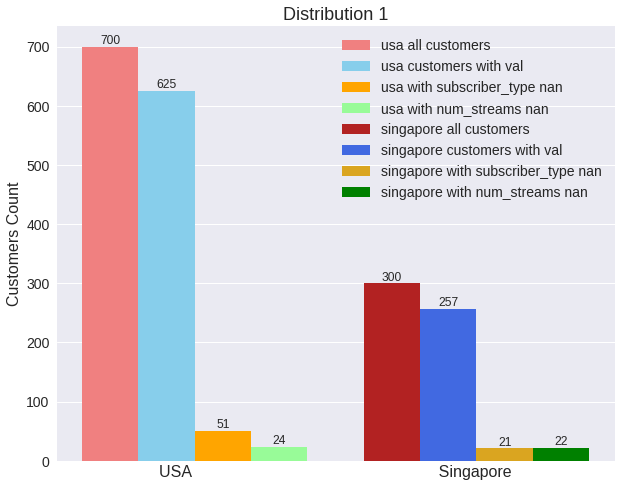

In [11]:
# plot the distribution of customers from different countries that have missing values (bar chart)

usa_customers = (data['country_name'] == 'united_states').sum()
usa_customers_val = usa_customers-usa_subscriber_type_nan-usa_num_streams_nan
singapore_customers = (data['country_name'] == 'singapore').sum()
singapore_customers_val = singapore_customers-singapore_subscriber_type_nan-singapore_num_streams_nan

x = np.arange(1)
width = 0.2

b1 = plt.bar(
    x, 
    [usa_customers],
    width,
    color='lightcoral',
    label='usa all customers',
)
b2 = plt.bar(
    x+width,
    [usa_customers_val],
    width, 
    color='skyblue',
    label='usa customers with val',
)
b3 = plt.bar(
    x+width*2,
    [usa_subscriber_type_nan],
    width,
    color='orange',
    label='usa with subscriber_type nan',
)
b4 = plt.bar(
    x+width*3, 
    [usa_num_streams_nan], 
    width, 
    color='palegreen',
    label='usa with num_streams nan',
)
b5 = plt.bar(
    x+width*5, 
    [singapore_customers],
    width, 
    color='firebrick',
    label='singapore all customers',
)
b6 = plt.bar(
    x+width*6,
    [singapore_customers_val],
    width,
    color='royalblue',
    label='singapore customers with val',
)
b7 = plt.bar(
    x+width*7,
    [singapore_subscriber_type_nan],
    width,
    color='goldenrod',
    label='singapore with subscriber_type nan',
)
b8 = plt.bar(
    x+width*8,
    [singapore_num_streams_nan],
    width, 
    color='green',
    label='singapore with num_streams nan',
)

bars = [b1, b2, b3, b4, b5, b6, b7, b8]

for i in range(len(bars)):
    plt.bar_label(bars[i])

plt.title('Distribution 1')
plt.xlabel(f'USA{" "*55}Singapore')
plt.ylabel("Customers Count")
plt.xticks([])
plt.legend(loc="upper right")
plt.show()

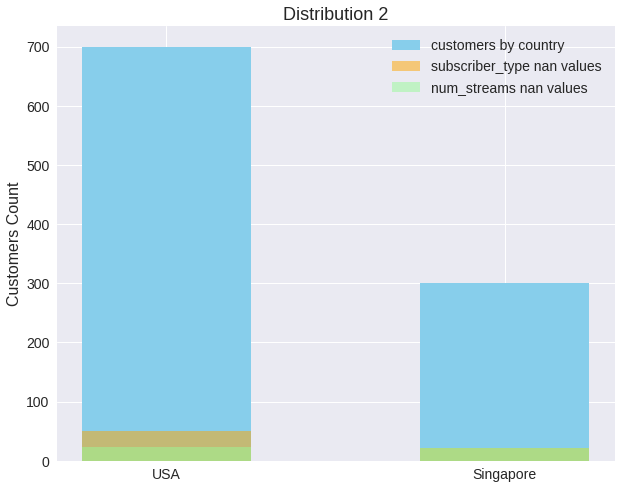

In [12]:
total_customers_count = [usa_customers, singapore_customers]
subscriber_type_nan = [usa_subscriber_type_nan, singapore_subscriber_type_nan]
num_streams_nan = [usa_num_streams_nan, singapore_num_streams_nan]
countries_name = ['USA', 'Singapore']

plt.bar(
    countries_name,
    total_customers_count, 
    label='customers by country',
    color='skyblue',
    alpha=1,
    width=0.5,
)
plt.bar(
    countries_name,
    subscriber_type_nan,
    label='subscriber_type nan values',
    color='orange',
    alpha=0.5,
    width=0.5,
)
plt.bar(
    countries_name,
    num_streams_nan,
    label='num_streams nan values',
    color='palegreen',
    alpha=0.5,
    width=0.5,
)

plt.title('Distribution 2')
plt.ylabel("Customers Count")
plt.legend(loc="upper right")
plt.show()